In [32]:
import numpy as np
import os
import globals as gl
import matplotlib.pyplot as plt

plt.style.use('default')

In [33]:
sns = [101, 102, 103, 104, 105]
H = 'L'
experiment = 'EFC_learningfMRI'
path_alignment = os.path.join(gl.baseDir, experiment, 'alignment',)

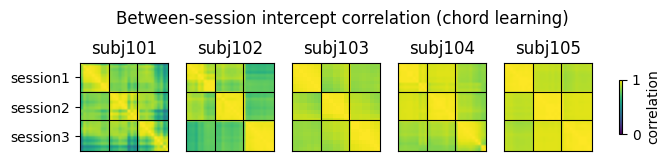

In [46]:
fig, axs = plt.subplots(1, len(sns), sharex=False, sharey=False, figsize=(7, 2))

for s, sn in enumerate(sns):
    ax = axs[s]
    corr = np.load(os.path.join(path_alignment, f'subj{sn}', f'corr.intercept.merged.npy'))
    nRuns = corr.shape[0] // 3 - .5
    ytick = corr.shape[0] // 3 - corr.shape[0] // 6
    ax.imshow(corr, vmin=0, vmax=1, cmap='viridis')
    ax.axhline(nRuns, color='k', lw=.8)
    ax.axhline(2 * nRuns, color='k', lw=.8)
    ax.axvline(nRuns, color='k', lw=.8)
    ax.axvline(2 * nRuns, color='k', lw=.8)
    ax.set_xticks([])
    ax.set_yticks([ytick- .5, 3 * ytick- .5, 5 * ytick- .5]) if s==0 else ax.set_yticks([])
    ax.set_yticklabels(['session1', 'session2', 'session3']) if s==0 else None
    ax.set_title(f'subj{sn}')

fig.suptitle(f'Between-session intercept correlation (chord learning)')
cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('correlation')